##### Introduction
In this notebook, I will build a K-Means Clustering model from scratch using Python. Then I will test my implementation using scikit-learn's make_blobs function, which generates isotropic Gaussian blobs for clustering.

For this example, I will create 3000 Gaussian blobs with 5 clusters, and the goal of my model is to correctly find a decision boundary to classify these unlabeled blobs into one of the 5 clusters.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
np.random.seed(10)
num_clusters = 5
max_iterations = 10000
plot_figure = True

X, _ = make_blobs(n_samples=3000, n_features=2, centers=num_clusters)

m = X.shape[0]
features = X.shape[1]

Let's take a look at the sample we created

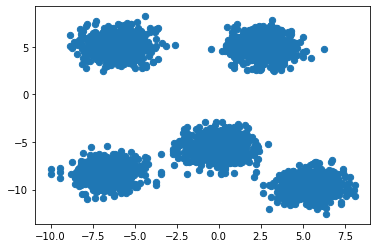

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap=plt.cm.Spectral)

We can clearly see the 5 clusters in this sample, and if our model is correct, it will create the clusters that effectively separate the points.

# Model Implementation

So the K-Means algorithm first randomly generate K clusters, in which K refers to how many clusters we want creates. Then, the algorithm will repeatedly group points to the Kth cluster that is cloest to them and recreate clusters at the center of each group. 

The exact procedure of K-Means Clustering is written as:

![](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)

in which:
* c(i) is the cluster X(i) is placed at and 
* u(j) is the jth centroid

- Create K random centroids 

In [4]:
def initialize_random_centroids(X):
    centroids = np.zeros((num_clusters, features))

    for k in range(num_clusters):
        centroid = X[np.random.choice(range(m))]
        centroids[k] = centroid

    return centroids

- Assign each point a centroid based on distance

In [5]:
def create_clusters(X, centroids):
    clusters = [[] for _ in range(num_clusters)]

    for point_id, point in enumerate(X):
        closest_centroid = np.argmin(
            np.sqrt(np.sum((point - centroids) ** 2, axis=1))
        )
        clusters[closest_centroid].append(point_id)

    return clusters

- Create new centroids at the center of points belonging to it

In [6]:
def calculate_new_centroids(X, clusters):
    centroids = np.zeros((num_clusters, features))
    for id, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[id] = new_centroid

    return centroids

- Final Prediction

In [7]:
def predict_cluster(X, clusters):
    y_pred = np.zeros(m)

    for cluster_id, cluster in enumerate(clusters):
        for sample_id in cluster:
            y_pred[sample_id] = cluster_id

    return y_pred

- For visualization purpose

In [8]:
def plot_fig(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

- Final Algorithm

In [9]:
def fit(X):
    centroids = initialize_random_centroids(X)

    for it in range(max_iterations):
        clusters = create_clusters(X, centroids)

        previous_centroids = centroids
        centroids = calculate_new_centroids(X, clusters)

        diff = centroids - previous_centroids

        if not diff.any():
            print("Termination criterion satisfied")
            break

    y_pred = predict_cluster(X, clusters)

    if plot_figure:
        plot_fig(X, y_pred)

    return y_pred

Termination criterion satisfied


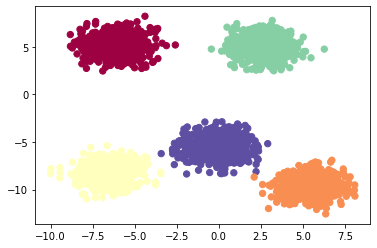

In [10]:
y_pred = fit(X)

The final output shows that our model effectively classifies all 3000 blobs into 5 clusters correctly. 